# Case Study 1

<h1>Recruit Restaurant Visitor Forecasting</h1>

<h3>Description:</h3>
<p>Running a thriving local restaurant isn't always as charming as first impressions appear. There are often all sorts of unexpected troubles popping up that could hurt business.

One common predicament is that restaurants need to know how many customers to expect each day to effectively purchase ingredients and schedule staff members. This forecast isn't easy to make because many unpredictable factors affect restaurant attendance, like weather and local competition. It's even harder for newer restaurants with little historical data.

Recruit Holdings has unique access to key datasets that could make automated future customer prediction possible. Specifically, Recruit Holdings owns Hot Pepper Gourmet (a restaurant review service), AirREGI (a restaurant point of sales service), and Restaurant Board (reservation log management software).

In this competition, you're challenged to use reservation and visitation data to predict the total number of visitors to a restaurant for future dates. This information will help restaurants be much more efficient and allow them to focus on creating an enjoyable dining experience for their customers.
</p>

<h3> Evaluation Metric : </h3>
<p> we are going to use <b>RMSLE(Root Mean Square Logarthimic Error)</b>. Lets Take quick look at it </p>

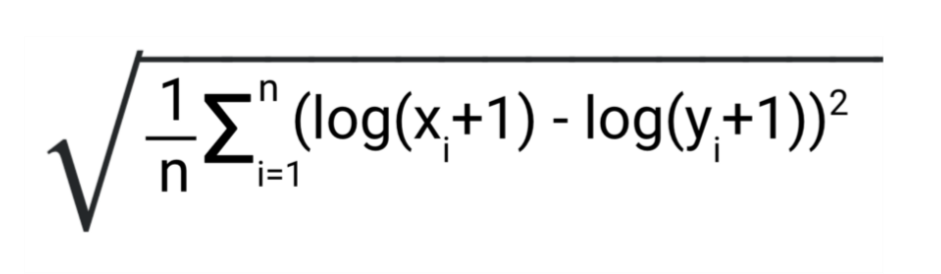

<p>
   n  - Total Number of Observations<br>
   xi - Predicted Number of Visitors<br> 
   yi - Actual Number of Visitors<br>
</p>
<h4>RMSLE::</h4>
<p>
1. RMSLE main feature is Biased based penalty.<br>
2. RMSLE incurs a larger penalty for the underestimation of the Actual variable than the Overestimation.<br>
3. In simple words, more penalty is incurred when the predicted Value is less than the Actual Value. On the other hand, Less penalty is incurred when the predicted value is more than the actual value.</br>

</p>


Reference: https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

<h3>Datasets:</h3>
<br>
<br>
<b>air_reserve.csv:</b><br>
This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.<br>

air_store_id - the restaurant's id in the air system<br>
visit_datetime - the time of the reservation<br>
reserve_datetime - the time the reservation was made<br>
reserve_visitors - the number of visitors for that reservation<br>

<b>hpg_reserve.csv:</b><br>
This file contains reservations made in the hpg system.<br>

hpg_store_id - the restaurant's id in the hpg system<br>
visit_datetime - the time of the reservation<br>
reserve_datetime - the time the reservation was made<br>
reserve_visitors - the number of visitors for that reservation<br>

<b>air_store_info.csv:</b><br>
This file contains information about select air restaurants. Column names and contents are self-explanatory.<br>

air_store_id<br>
air_genre_name<br>
air_area_name<br>
latitude<br>
longitude<br>
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs

<b>hpg_store_info.csv</b><br>
This file contains information about select hpg restaurants. Column names and contents are self-explanatory.<br>

hpg_store_id<br>
hpg_genre_name<br>
hpg_area_name<br>
latitude<br>
longitude<br>
Note: latitude and longitude are the latitude and longitude of the area to which the store belongs<br>

<b>store_id_relation.csv</b><br>
This file allows you to join select restaurants that have both the air and hpg system.<br>
hpg_store_id<br>
air_store_id<br>

<b>air_visit_data.csv</b><br>
This file contains historical visit data for the air restaurants.<br>

<b>air_store_id</b><br>
visit_date - the date<br>
visitors - the number of visitors to the restaurant on the date<br>
<b>sample_submission.csv</b><br>
This file shows a submission in the correct format, including the days for which you must forecast.<br>

id - the id is formed by concatenating the air_store_id and visit_date with an underscore<br>
visitors- the number of visitors forecasted for the store and date combination<br>
<b>date_info.csv</b><br>
This file gives basic information about the calendar dates in the dataset.<br>

calendar_date<br>
day_of_week<br>
holiday_flg - is the day a holiday in Japan<br>


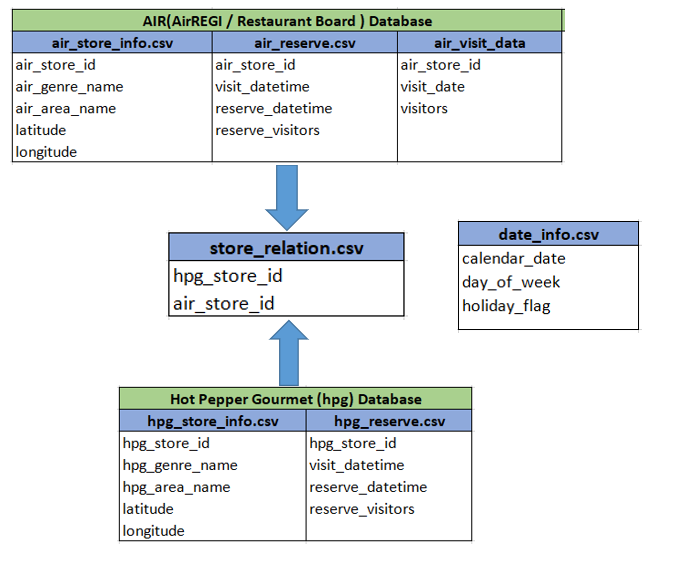

<h2>RMSLE Explanation with sample</h2>

In [6]:
import math
def cal_rmse(X,Y):
    return math.sqrt((X-Y)**2)
def cal_rmsle(X,Y):
    tmp1 = math.log(X+1)
    tmp2 = math.log(Y+1)
    return math.sqrt((tmp1-tmp2)**2)
Y=500 #Actual
X=range(0,1000) #predicted

pred_act_diff = [i-Y for i in X]
rmse_pred = [ cal_rmse(i,Y) for i in X ]
rmsle_pred = [ cal_rmsle(i,Y) for i in X ]

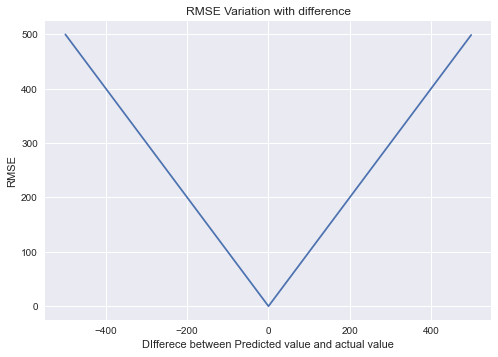

In [8]:
plt.plot(pred_act_diff,rmse_pred)
plt.xlabel('DIfferece between Predicted value and actual value')
plt.ylabel('RMSE')
plt.title('RMSE Variation with difference')
plt.show()

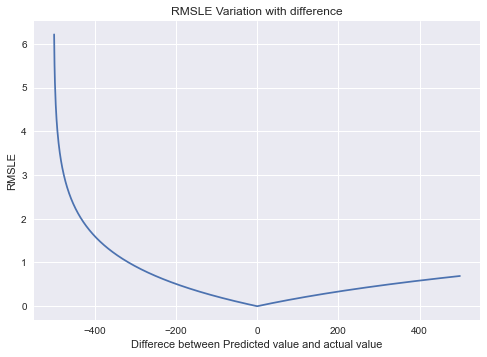

In [9]:
plt.plot(pred_act_diff,rmsle_pred)
plt.xlabel('Differece between Predicted value and actual value')
plt.ylabel('RMSLE')
plt.title('RMSLE Variation with difference')
plt.show()

<h3>RMSLE Explanation </h3>

1. In the Above graphs we can observe, RMSE is same in both underfit and overfit scenerio.</br>
2. In RMSLE, we can observe it penelised less on over predictions. Which is importent. Because it helps plan groceries in Restaurant properly.

<h2>Exploratory Data Analysis</h2>

In [4]:
#import Packages
import numpy as np
import pandas as pd
import datetime
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
plt.style.use('seaborn')
import os
from sklearn.cluster import MiniBatchKMeans, KMeans
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

In [24]:
#Reading the Data
def read_data():
    '''Reading the Data from all the given files'''
    print("Data reading...")
    air_reserve = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\air_reserve.csv")
    air_store_info = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\air_store_info.csv")
    air_visit_data = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\air_visit_data.csv")
    date_info = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\date_info.csv")
    hpg_reserve = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\hpg_reserve.csv")
    hpg_store_info = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\hpg_store_info.csv")
    sample_submission = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\sample_submission.csv")
    store_id_relation = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\store_id_relation.csv")
    
    print("Data read complete!!")
    return air_reserve,air_store_info,air_visit_data,date_info,hpg_reserve,hpg_store_info,sample_submission,store_id_relation
air_reserve,air_store_info,air_visit_data,date_info,hpg_reserve,hpg_store_info,sample_submission,store_id_relation = read_data()

Data reading...
Data read complete!!


In [25]:
#Converting All the Datatypes
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve.visit_datetime)
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve.reserve_datetime)
air_visit_data['visit_date'] = pd.to_datetime(air_visit_data.visit_date)
date_info['calendar_date'] = pd.to_datetime(date_info.calendar_date)
hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve.visit_datetime)
hpg_reserve['reserve_datetime'] = pd.to_datetime(hpg_reserve.reserve_datetime)

# Data Preparation

In [26]:

# rename the 'calendar_date' column to 'visit date'
date_info.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
#as air_visit_data has visitor count
data = pd.merge(air_visit_data,date_info,on="visit_date",how='left')
#Will store in sorted manner as data is timeseries data
data.sort_values(by='visit_date',inplace=True,ignore_index=True)
data = pd.merge(data, air_store_info, how='left',on=['air_store_id'])
data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438


In [28]:
#Reservation Data
#Adding time difference
air_reserve['time_diff'] = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']
air_reserve['time_diff'] = air_reserve['time_diff'].dt.seconds.astype('int16')
air_reserve['time_diff'] = air_reserve['time_diff'] / 3600

#Number of reservations perday
air_reserve['visit_date'] = air_reserve.visit_datetime.dt.date
air_reservations = air_reserve.groupby(by=['air_store_id', 'visit_date'], as_index=False).sum()
air_reservations['visit_date'] = pd.to_datetime(air_reservations.visit_date)


#merge both the fields
data = pd.merge(data, air_reservations, how='left', on=['air_store_id','visit_date'])

data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors,time_diff
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,NaN,NaN
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,NaN,NaN
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,NaN,NaN
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,NaN,NaN
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,NaN,NaN


In [29]:
data.fillna(0, inplace=True)
data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors,time_diff
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0


########################################################################
###########################2.HPG DATA###################################
########################################################################

In [30]:
#Get AIR Store ID
hpg_reserve = pd.merge(hpg_reserve, store_id_relation,on='hpg_store_id',how='inner')
hpg_reserve = pd.merge(hpg_reserve, hpg_store_info,on='hpg_store_id',how='left')
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664


In [31]:
#Reservation Data
#Adding time difference
hpg_reserve['time_diff'] = hpg_reserve['visit_datetime'] - hpg_reserve['reserve_datetime']
hpg_reserve['time_diff'] = hpg_reserve['time_diff'].dt.seconds.astype('int16')
hpg_reserve['time_diff'] = hpg_reserve['time_diff'] / 3600

#Number of reservations perday
hpg_reserve['visit_date'] = hpg_reserve.visit_datetime.dt.date
hpg_reservations = hpg_reserve.groupby(by=['air_store_id','visit_date'],as_index=False).sum()
hpg_reservations['visit_date'] = pd.to_datetime(hpg_reservations.visit_date)
hpg_reservations.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
hpg_reservations.rename(columns={'time_diff': 'hpg_time_diff'}, inplace=True)
hpg_reservations.rename(columns={'reserve_visitors': 'hpg_reserve_visitors'}, inplace=True)

In [36]:
data = pd.merge(data,hpg_reservations[['air_store_id','visit_date','hpg_reserve_visitors','hpg_time_diff']],\
               on=['air_store_id','visit_date'],how='left'
               )
data.fillna(0, inplace=True)
data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,reserve_visitors,time_diff,hpg_reserve_visitors,hpg_time_diff
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0


In [69]:
#Save the file in CSV:
data.rename(columns={'reserve_visitors': 'air_reserve_visitors','time_diff':'air_time_diff'}, inplace=True)
data.to_csv("E:\\AAIC\\Case Study\\Case Study 1\\features_extracted\\combined_data.csv", index=False)

# Exploratory Data Analysis

In [37]:
#Read the file
visitors_data = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\features_extracted\\combined_data.csv")
visitors_data['visit_date'] = pd.to_datetime(visitors_data.visit_date)
visitors_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,air_reserve_visitors,air_time_diff,hpg_reserve_visitors,hpg_time_diff,visit_year_month,Day_of_Week,Month
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0,2016-01,Friday,January
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0,2016-01,Friday,January
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0,2016-01,Friday,January
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0,2016-01,Friday,January
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0,2016-01,Friday,January


In [38]:
visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   air_store_id          252108 non-null  object        
 1   visit_date            252108 non-null  datetime64[ns]
 2   visitors              252108 non-null  int64         
 3   day_of_week           252108 non-null  object        
 4   holiday_flg           252108 non-null  int64         
 5   air_genre_name        252108 non-null  object        
 6   air_area_name         252108 non-null  object        
 7   latitude              252108 non-null  float64       
 8   longitude             252108 non-null  float64       
 9   air_reserve_visitors  252108 non-null  float64       
 10  air_time_diff         252108 non-null  float64       
 11  hpg_reserve_visitors  252108 non-null  float64       
 12  hpg_time_diff         252108 non-null  float64       
 13 

<h2>1. Visitors per day </h2>

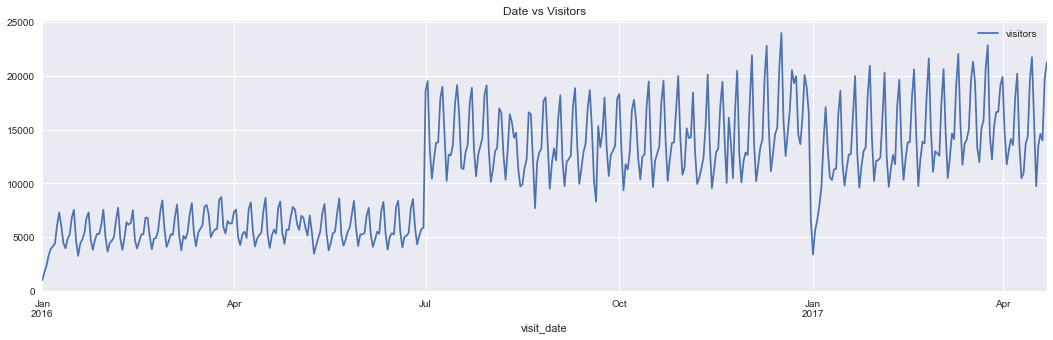

In [13]:
vistors_by_day = visitors_data[['visit_date','visitors']].groupby('visit_date').sum()
vistors_by_day.plot(figsize=[18,5])

#TItle and Grid
plt.title('Date vs Visitors')
plt.grid(True)

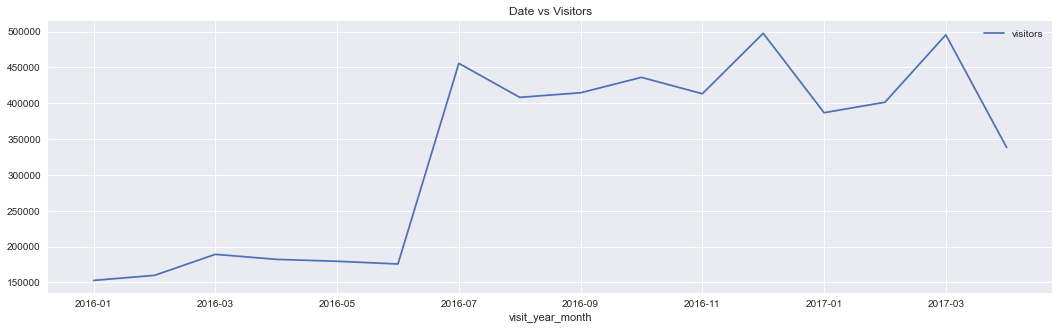

In [16]:
#Monthwise visitors plot
visitors_data['visit_year_month'] = visitors_data['visit_date'].apply(lambda x:str(x)[:7])
vistors_per_month = visitors_data[['visit_year_month','visitors']].groupby('visit_year_month').sum()
vistors_per_month.plot(figsize=[18,5])

#TItle and Grid
plt.title('Date vs Visitors')
plt.grid(True)

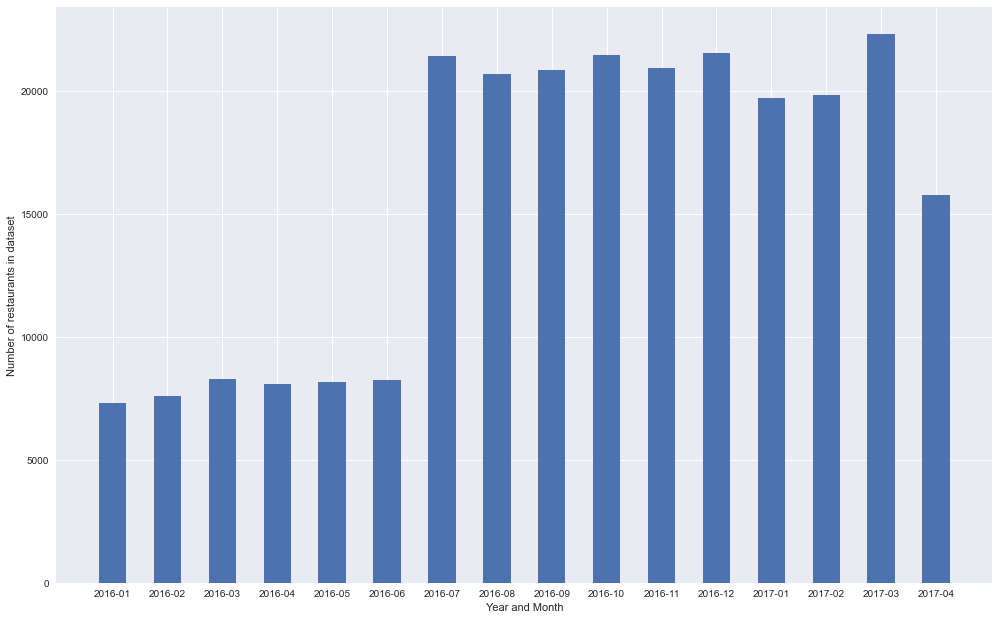

In [39]:
visitors_data['dummy'] = np.ones(len(visitors_data))
visitors_data_new = visitors_data.groupby(['visit_year_month']).sum().reset_index()

fig = plt.figure(figsize=[13,8])
ax = fig.add_axes([0,0,1,1])
ax.bar(visitors_data_new.visit_year_month,visitors_data_new.dummy,width=0.5)

plt.xlabel('Year and Month')
plt.ylabel('Number of restaurants in dataset')
plt.show()
visitors_data.drop('dummy',axis=1,inplace=True)

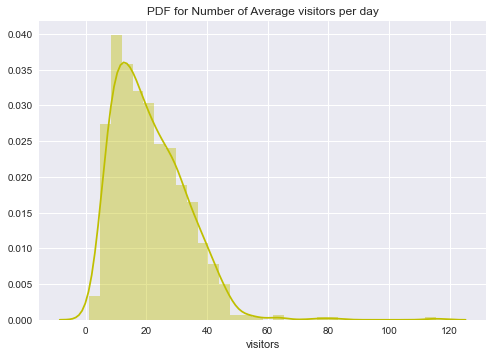

In [41]:
#Dist plot on average visitors to the restaurant
avg_visitors=visitors_data.groupby('air_store_id').mean()
ax = sns.distplot(avg_visitors['visitors'],color="y")
plt.title('PDF for Number of Average visitors per day')
plt.show()

In [7]:
#Very Few records has more than 40 reservations per day
#Soo lets Zoom into the data
avg_visitors=avg_visitors.reset_index()
avg_visitors.head()

,air_store_id,visitors,holiday_flg,latitude,longitude,air_reserve_visitors,air_time_diff,hpg_reserve_visitors,hpg_time_diff
0,air_00a91d42b08b08d9,26.081897,0.004310,35.694003,139.753595,0.301724,0.182701,1.568966,0.659406
1,air_0164b9927d20bcc3,9.248322,0.033557,35.658068,139.751599,3.275168,2.411723,0.000000,0.000000
2,air_0241aa3964b7f861,9.896465,0.042929,35.712607,139.779996,0.000000,0.000000,0.000000,0.000000
3,air_0328696196e46f18,7.939655,0.051724,34.701279,135.528090,0.000000,0.000000,0.000000,0.000000
4,air_034a3d5b40d5b1b1,14.828685,0.059761,34.692337,135.472229,0.370518,0.100239,0.000000,0.000000


In [11]:
avg_visitors['visitors'].quantile([.1, .25, .5, .75,1])

0.10      8.072910
0.25     11.812010
0.50     19.183406
0.75     28.645161
1.00    115.470588
Name: visitors, dtype: float64

<h3>Observations:</h3>
<br>
1. from 2016-07 Number of visitors per day are increased drastically.<br>
2. In the bar plot we can observe that number of restaurants got increased in the dataset after 2016-07. Data for those restaurants is missing before 2017-07.<br>
3. We can observe in distplot(plotted for average number of visitors per day). more number of restaurants have less than 20 visitors per day.<br>
4. If we see percentiles, more than 75% restaurants has average visitors as 28.<br>

<h2>2. Mean visitors in each week day </h2>

In [30]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
visitors_data['Day_of_Week'] = pd.Series(visitors_data.visit_date).dt.day_name()
visitors_data['Day_of_Week']=visitors_data['Day_of_Week'].astype(cat_type)
df_weekday = visitors_data.groupby('Day_of_Week').mean()
df_weekday

,visitors,holiday_flg,latitude,longitude,reserve_visitors,time_diff,hpg_reserve_visitors,hpg_time_diff
Day_of_Week,,,,,,,,
Monday,17.177009,0.119311,35.603786,137.311697,1.045483,0.494164,0.217916,0.123664
Tuesday,17.672137,0.014077,35.622064,137.440857,1.117645,0.596946,0.206553,0.126062
Wednesday,19.230121,0.024612,35.608566,137.420034,1.302681,0.662843,0.284399,0.147491
Thursday,18.922702,0.084772,35.607479,137.373897,1.289215,0.665334,0.274687,0.147998
Friday,23.072737,0.040346,35.611443,137.374654,2.165473,1.095628,0.600679,0.311096
Saturday,26.313688,0.044725,35.621440,137.347762,2.239927,1.161271,0.616168,0.364109
Sunday,23.873362,0.032576,35.616347,137.200999,1.343070,0.613695,0.283685,0.135105


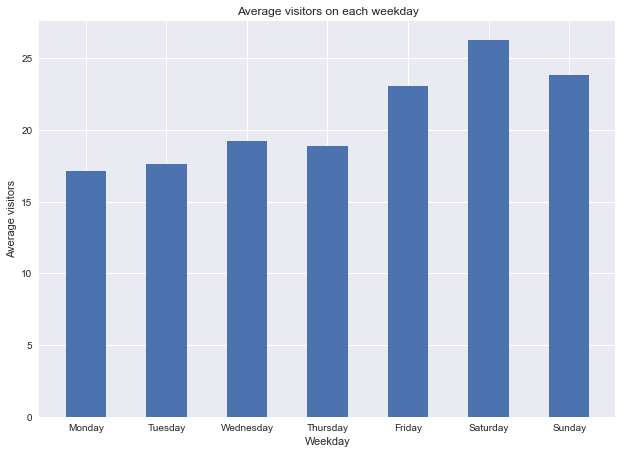

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_weekday.index,df_weekday['visitors'],width=0.5)

plt.title("Average visitors on each weekday")
plt.xlabel("Weekday")
plt.ylabel("Average visitors")
plt.show()

In [43]:
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October','November','December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
visitors_data['Month'] = visitors_data['visit_date'].dt.month_name()
visitors_data['Month']=visitors_data['Month'].astype(cat_type)
df_month = visitors_data.groupby('Month').mean()
df_month

,visitors,holiday_flg,latitude,longitude,reserve_visitors,time_diff,hpg_reserve_visitors,hpg_time_diff
Month,,,,,,,,
January,19.976758,0.056847,35.590659,137.290119,2.022465,1.028144,0.313842,0.197810
February,20.477695,0.036367,35.586378,137.336064,2.170454,1.147286,0.333248,0.193513
March,22.400360,0.032614,35.592137,137.339230,2.554465,1.247076,0.472457,0.226278
April,21.816002,0.011736,35.590887,137.362917,2.144977,1.067176,0.366528,0.181942
May,22.009313,0.088347,35.522300,137.266436,1.026467,0.542258,0.247764,0.121986
June,21.319510,0.000000,35.545545,137.304060,0.552080,0.276093,0.271371,0.136201
July,21.267653,0.024082,35.645835,137.407043,0.213982,0.131659,0.281094,0.170279
August,19.748489,0.112406,35.645868,137.389662,0.000097,0.000290,0.269262,0.159886
September,19.908445,0.058572,35.645041,137.406292,0.000576,0.000931,0.280186,0.160343


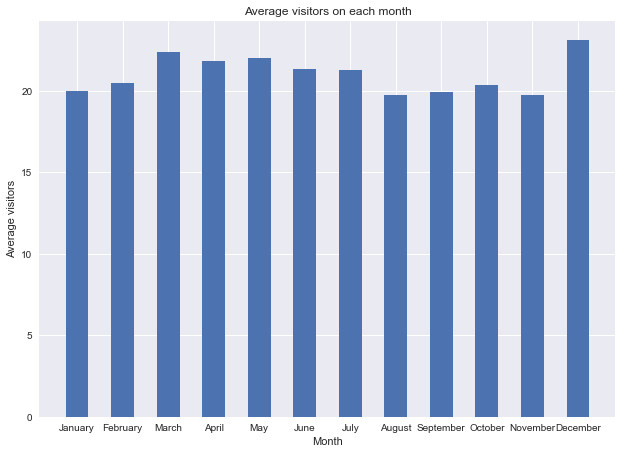

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_month.index,df_month['visitors'],width=0.5)

plt.title("Average visitors on each month")
plt.xlabel("Month")
plt.ylabel("Average visitors")
plt.show()

<h3>Observations:</h3>
    <br>
1. Weekends have more visitors than weekdays.<br>
2. We Observed Monthwise december has more visitors.<br>

<h2>3. Reservations per month </h2>

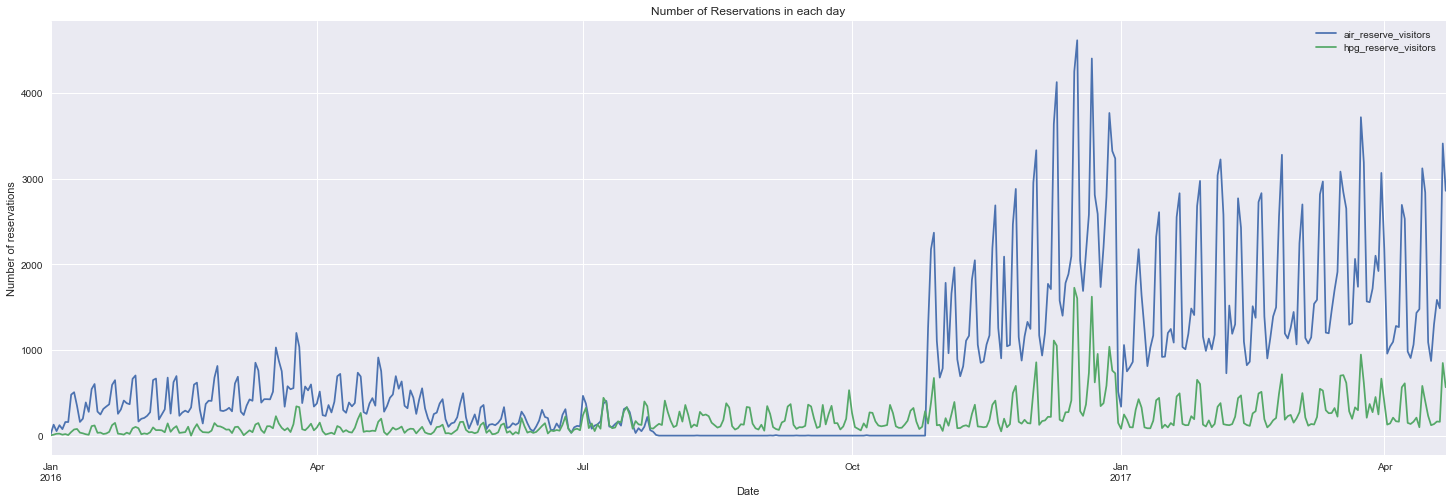

In [61]:
air_reserve_cnt = visitors_data.groupby('visit_date')['air_reserve_visitors'].sum()
hpg_reserve_cnt = visitors_data.groupby('visit_date')['hpg_reserve_visitors'].sum()

air_reserve_cnt.plot(figsize=[25,8])
plt.grid(True)

hpg_reserve_cnt.plot(figsize=[25,8])
#TItle and Grid
plt.grid(True)

plt.title("Number of Reservations in each day")
plt.xlabel("Date")
plt.ylabel("Number of reservations")

plt.legend()
plt.show()
#mothwise

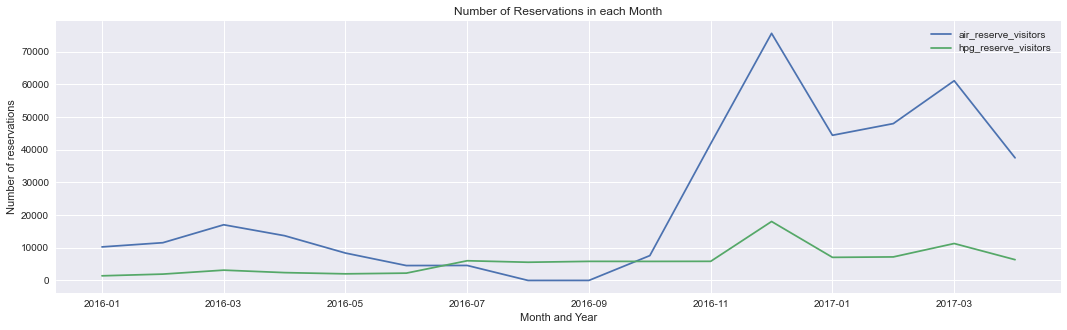

In [68]:
air_reserve_cnt = visitors_data.groupby('visit_year_month')['air_reserve_visitors'].sum()
hpg_reserve_cnt = visitors_data.groupby('visit_year_month')['hpg_reserve_visitors'].sum()

air_reserve_cnt.plot(figsize=[18,5])
plt.grid(True)

hpg_reserve_cnt.plot(figsize=[18,5])
#TItle and Grid
plt.grid(True)
#mothwise

plt.title("Number of Reservations in each Month")
plt.xlabel("Month and Year")
plt.ylabel("Number of reservations")
plt.legend()
plt.show()

No handles with labels found to put in legend.


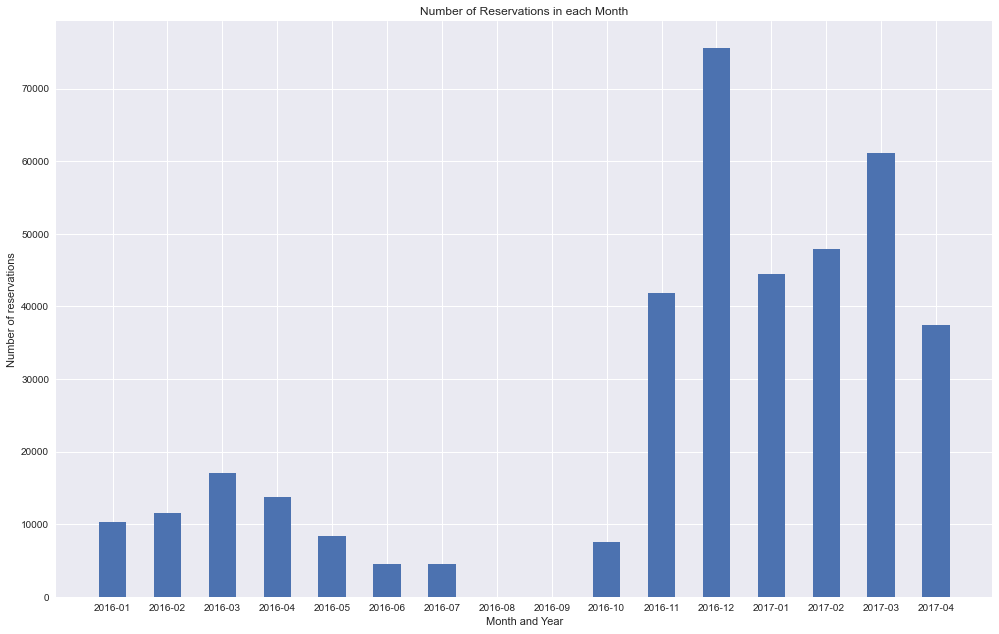

No handles with labels found to put in legend.


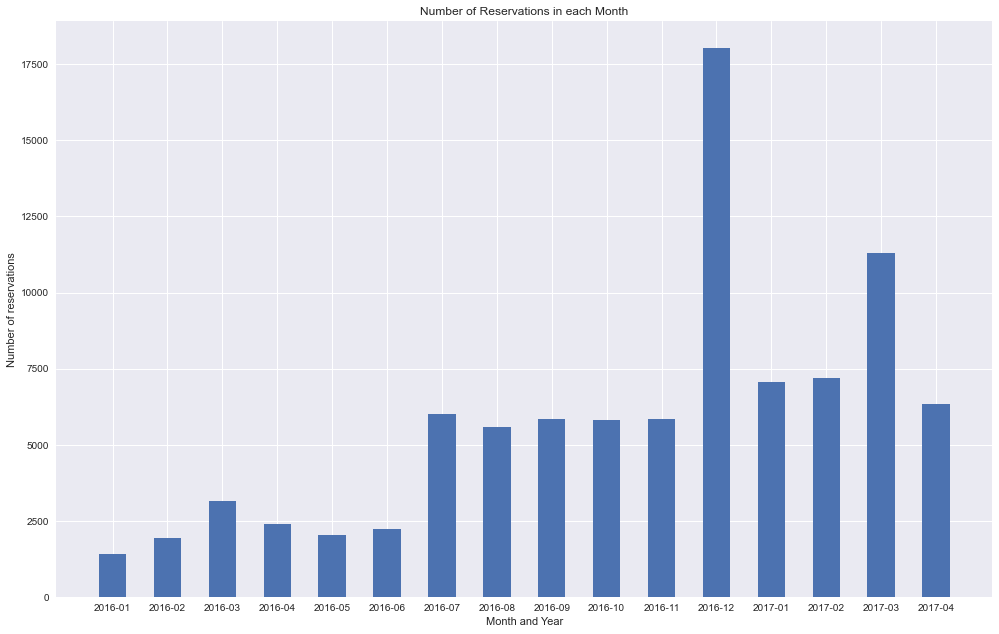

In [81]:
air_reserve_cnt = visitors_data.groupby('visit_year_month')['air_reserve_visitors'].sum().reset_index()
hpg_reserve_cnt = visitors_data.groupby('visit_year_month')['hpg_reserve_visitors'].sum().reset_index()

fig = plt.figure(figsize=[13,8])
ax = fig.add_axes([0,0,1,1])
ax.bar(air_reserve_cnt.visit_year_month,air_reserve_cnt.air_reserve_visitors,width=0.5)
plt.title("Number of Reservations in each Month")
plt.xlabel("Month and Year")
plt.ylabel("Number of reservations")
plt.legend()
plt.show()

fig = plt.figure(figsize=[13,8])
ax = fig.add_axes([0,0,1,1])
ax.bar(hpg_reserve_cnt.visit_year_month,hpg_reserve_cnt.hpg_reserve_visitors,width=0.5)
plt.title("Number of Reservations in each Month")
plt.xlabel("Month and Year")
plt.ylabel("Number of reservations")
plt.legend()
plt.show()

<h3>Observations:</h3>
<br>
1. We can observe spike in number of reservations in december month in both HPG and AIR.<br>

<h2>4. Number reservations per hour in AIR and HPG</h2>

In [78]:
air_reserve = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\air_reserve.csv")
hpg_reserve = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\hpg_reserve.csv")

In [79]:
air_reserve['visit_hour'] = air_reserve['visit_datetime'].apply(lambda x: x[11:][:2] )
hpg_reserve['visit_hour'] = hpg_reserve['visit_datetime'].apply(lambda x: x[11:][:2] )

air_reserve_hour = air_reserve.groupby('visit_hour').sum()
hpg_reserve_hour = hpg_reserve.groupby('visit_hour').sum()

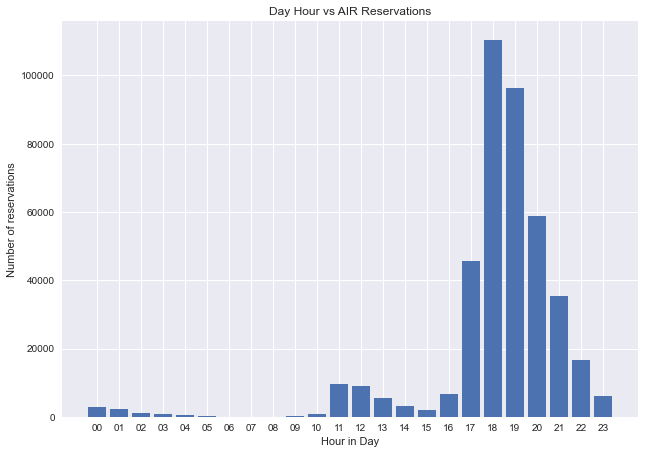

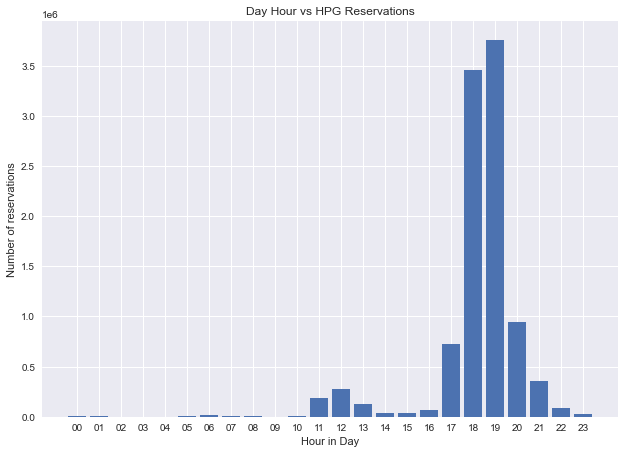

In [82]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(air_reserve_hour.index,air_reserve_hour['reserve_visitors'])
plt.title('Day Hour vs AIR Reservations')
plt.xlabel("Hour in Day")
plt.ylabel("Number of reservations")
plt.show()


fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(hpg_reserve_hour.index,hpg_reserve_hour['reserve_visitors'])
#TItle and Grid
plt.title('Day Hour vs HPG Reservations')
plt.xlabel("Hour in Day")
plt.ylabel("Number of reservations")
plt.show()

<h3>Observations:</h3>
<br>
1. Restaurants tend to have more visitors in the evening between 5 to 9.<br>

<h2>5. Hour Difference feature between reserve_time and visit_time<h2>

In [16]:
# get the reservations done on HPG
hpg_reserve = pd.merge(store_id_relation, hpg_reserve, how='left', on='hpg_store_id')
hpg_reserve.drop("hpg_store_id", axis=1, inplace=True)

# concat both AIR and HPG reservations
reservation_data = pd.concat([air_reserve, hpg_reserve])

# add the hour gap diff between reseravtion time as a feature
reservation_data.visit_datetime = pd.to_datetime(reservation_data.visit_datetime)
reservation_data.reserve_datetime = pd.to_datetime(reservation_data.reserve_datetime)
reservation_data['reservation_gap'] = reservation_data.visit_datetime - reservation_data.reserve_datetime
reservation_data['reservation_gap'] = reservation_data.reservation_gap / np.timedelta64(1,'h')

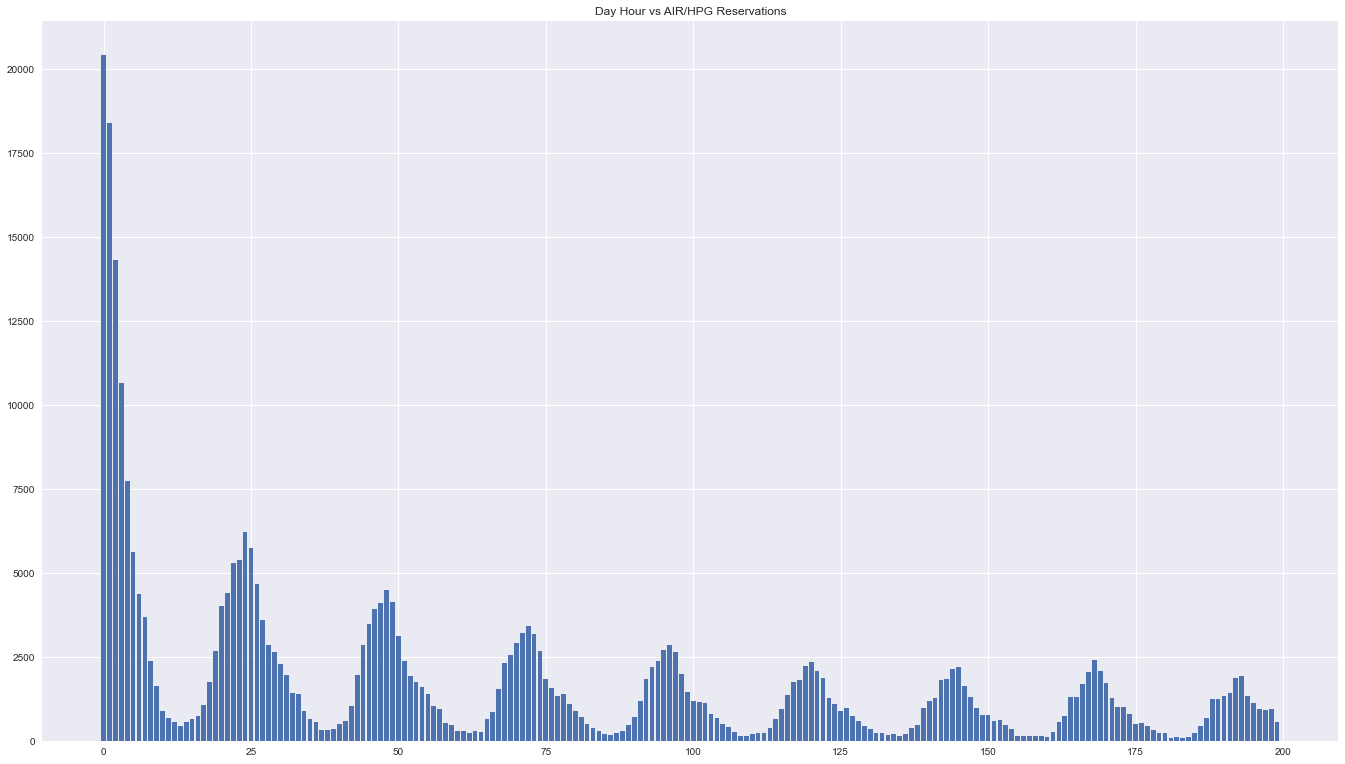

In [59]:
air_reserve_hour_diff = reservation_data.groupby('reservation_gap').sum()
air_reserve_hour_diff=air_reserve_hour_diff.reset_index()
fig1 = plt.figure(figsize=[18,10])
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(air_reserve_hour_diff['reservation_gap'][:200],air_reserve_hour_diff['reserve_visitors'][:200])
plt.title('Day Hour vs AIR/HPG Reservations')

plt.show()

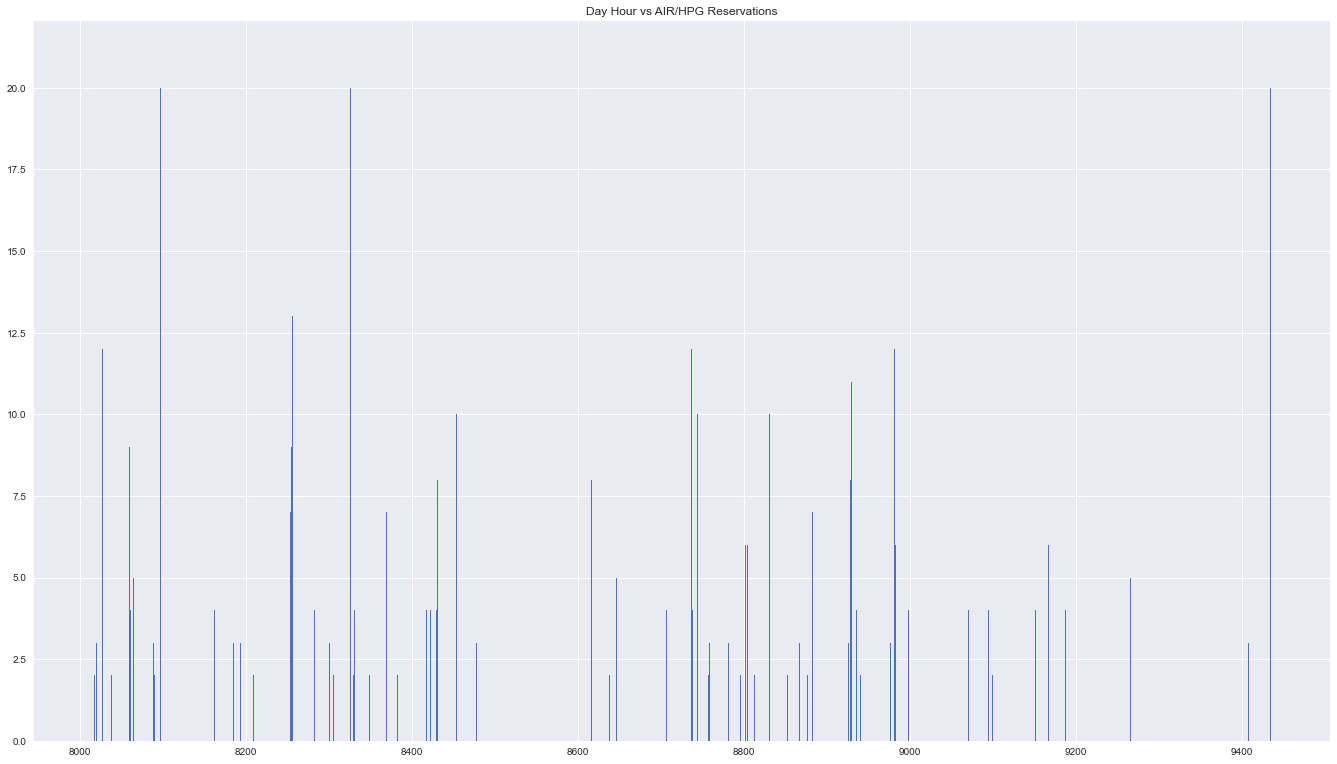

In [62]:

fig1 = plt.figure(figsize=[18,10])
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(air_reserve_hour_diff['reservation_gap'][-100:],air_reserve_hour_diff['reserve_visitors'][-100:])
plt.title('Day Hour vs AIR/HPG Reservations')

plt.show()

<h3>Observations:</h3>
<br>
1. more number of people are doing spot reservations.<br>
2. Again we can scenerio, where people booking a day or 2 days before the visit is more. and the trend continues.

<h2>6. Genre and Area Analysis <h2>

Text(0.5, 1.0, 'Genre vs AIR Restaurants')

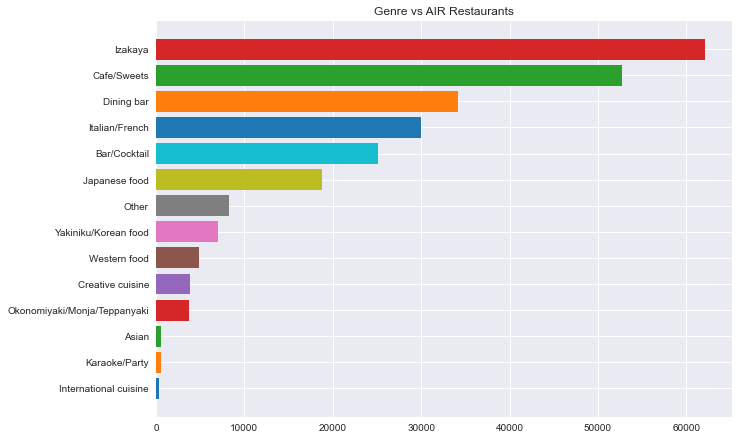

In [87]:
air_store_info_cnt = visitors_data.groupby('air_genre_name').count()
air_store_info_cnt = air_store_info_cnt.sort_values(by=['air_store_id'])

cmap = plt.cm.tab10
colors = cmap(np.arange(len(air_store_info_cnt)) % cmap.N)

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.barh(air_store_info_cnt.index,air_store_info_cnt['air_store_id'],color=colors)
plt.title('Genre vs AIR Restaurants')

<h3>Observations:</h3>
1. Izakaya Restaurants are more among all the genre in Japan.

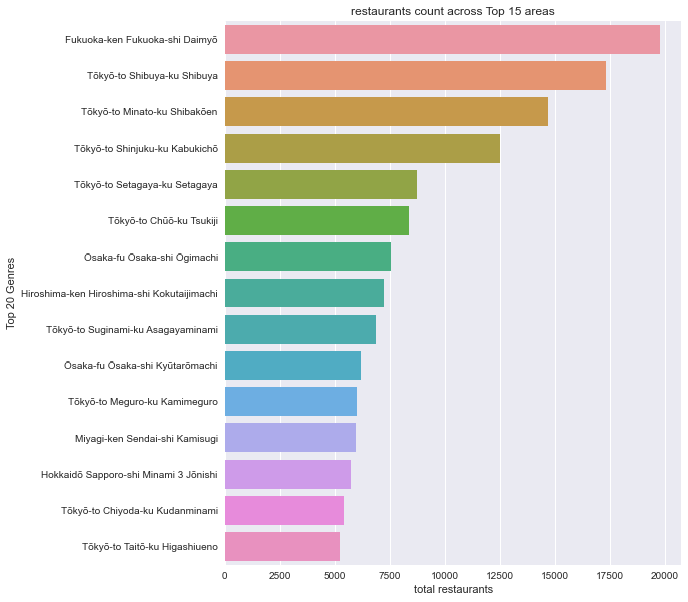

In [94]:

fig = plt.figure(figsize=(18,10))

# top 20
air_store_info_cnt = visitors_data.groupby("air_area_name", as_index=False).air_store_id.count()
air_store_info_cnt.sort_values(by='air_store_id', inplace=True, ascending=False)
air_store_info_cnt.reset_index(inplace=True)

ax1 = fig.add_subplot(121)
g = sns.barplot(x=air_store_info_cnt[:15].air_store_id, y=air_store_info_cnt.air_area_name[:15], ax=ax1)
plt.title("restaurants count across Top 15 areas")
plt.xlabel("total restaurants")
plt.ylabel("Top 20 Genres")

plt.show()

<h3>Observations:</h3>
1. Fakuoka, is a place in Japan where in data set we have more number of restaurants in same area.<br>
2. Tokyo also has more number of restaurants, but those are in different places.<br>

<h2>7. Latitude and Logitude Feature <h2>

In [102]:
#Getting Axes for any country
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [119]:
#Clustering
kmeans = MiniBatchKMeans(n_clusters=50, batch_size=10000,random_state=0).fit(visitors_data[['latitude','longitude']])
visitors_data['pickup_cluster'] = kmeans.predict(visitors_data[['latitude', 'longitude']])

In [116]:
kmeans.cluster_centers_

array([[ 34.71181126, 135.3399807 ],
       [ 35.67360879, 139.70696198],
       [ 33.58558606, 130.42454165],
       [ 43.05914019, 141.34604503],
       [ 38.2690761 , 140.8704029 ],
       [ 34.40722036, 132.64505081],
       [ 34.75910886, 137.84586961],
       [ 37.75401663, 138.92431655],
       [ 44.0206319 , 144.2733983 ],
       [ 43.67210155, 142.47054138]])

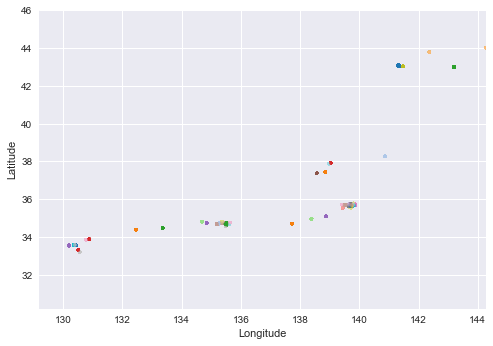

In [120]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (129.195555, 144.2733983)
    city_lat_border = (30.2119674, 46.0206319)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.longitude.values[:100000], frame.latitude.values[:100000], s=10, lw=0,
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(visitors_data)

In [121]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=geolocate('Japan'), tiles='cartodbpositron',zoom_start=5,width=800, height=500, control_scale=True)
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

In [126]:
air_store_info = pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\Data\\air_store_info.csv")
japan_map = folium.Map(location=[36.2048, 138.2529], tiles="cartodbpositron", zoom_start=6, min_zoom=4)
marker_cluster = MarkerCluster().add_to(japan_map)

for row in air_store_info.values:   
    folium.Marker(location=[row[-2], row[-1]], popup=f"{row[0]} - {row[1]} - {row[2]}").add_to(marker_cluster)
japan_map

<h2>8. Holiday Effect <h2>

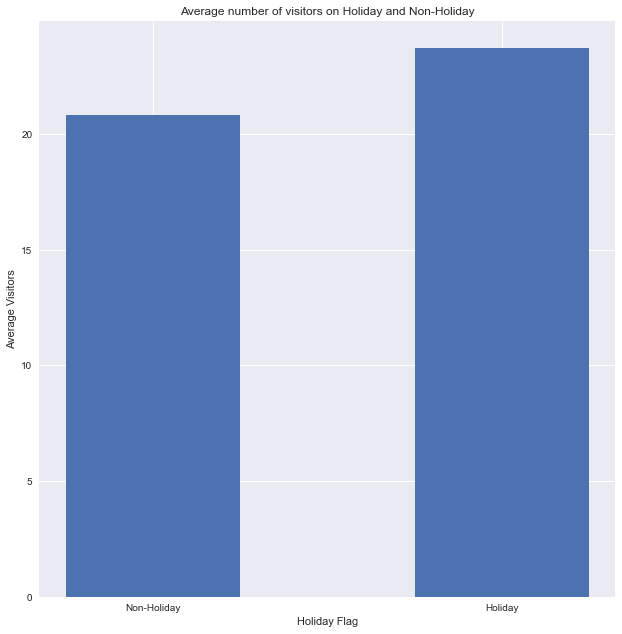

In [146]:
holiday_graph = visitors_data.groupby('holiday_flg').mean()
fig = plt.figure(figsize=[8,8])
ax = fig.add_axes([0,0,1,1])
ax.bar(['Non-Holiday','Holiday'],holiday_graph.visitors,width=0.5)
plt.title("Average number of visitors on Holiday and Non-Holiday")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Visitors")
plt.show()

In [154]:
#NextDay Holiday Flag
visitors_data['next_day_holiday_flag'] = visitors_data.day_of_week.isin(['Friday','Saturday']).astype(int)
visitors_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude,air_reserve_visitors,air_time_diff,hpg_reserve_visitors,hpg_time_diff,visit_year_month,Day_of_Week,Month,dummy,pickup_cluster,next_day_holiday_flag
0,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436,0.0,0.0,0.0,0.0,2016-01,Friday,January,1.0,46,1
1,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,0.0,0.0,0.0,0.0,2016-01,Friday,January,1.0,31,1
2,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056,0.0,0.0,0.0,0.0,2016-01,Friday,January,1.0,25,1
3,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073,0.0,0.0,0.0,0.0,2016-01,Friday,January,1.0,42,1
4,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,0.0,0.0,0.0,0.0,2016-01,Friday,January,1.0,23,1


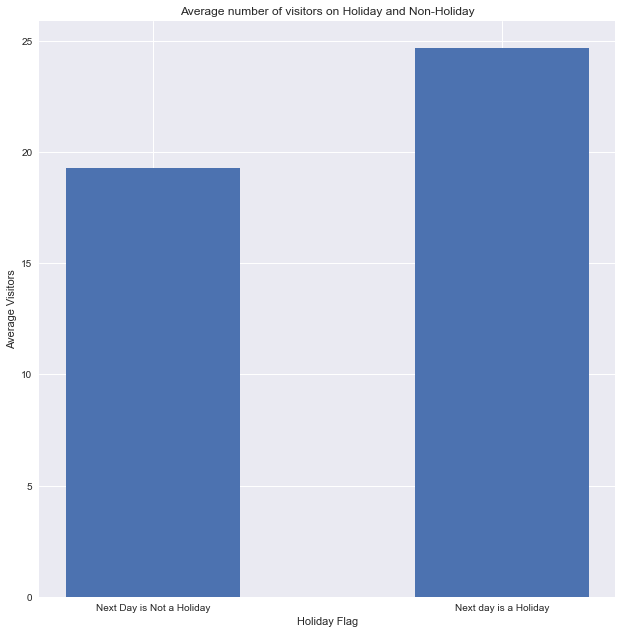

In [157]:
nextday_holiday_graph = visitors_data.groupby('next_day_holiday_flag').mean()
fig = plt.figure(figsize=[8,8])
ax = fig.add_axes([0,0,1,1])
ax.bar(['Next Day is Not a Holiday','Next day is a Holiday'],nextday_holiday_graph.visitors,width=0.5)
plt.title("Average number of visitors on Holiday and Non-Holiday")
plt.xlabel("Holiday Flag")
plt.ylabel("Average Visitors")
plt.show()

# Outlier Detection

In [5]:
visitors_data=pd.read_csv("E:\\AAIC\\Case Study\\Case Study 1\\features_extracted\\combined_data_2.csv")

Text(0.5, 1.0, 'Visitors distribution')

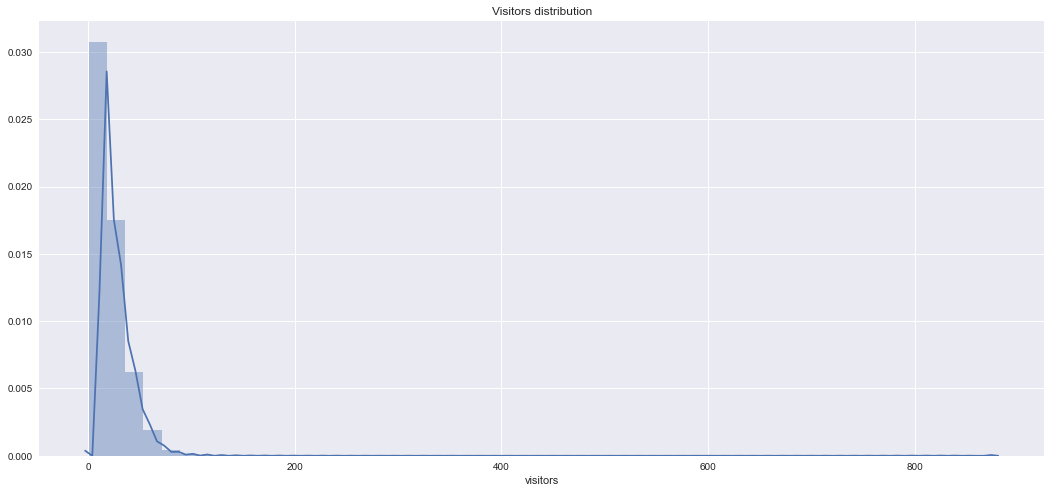

In [13]:
fig = plt.figure(figsize=(18, 8))

sns.distplot(visitors_data.visitors)
plt.title("Visitors distribution")

Text(0.5, 1.0, 'Visitors distribution')

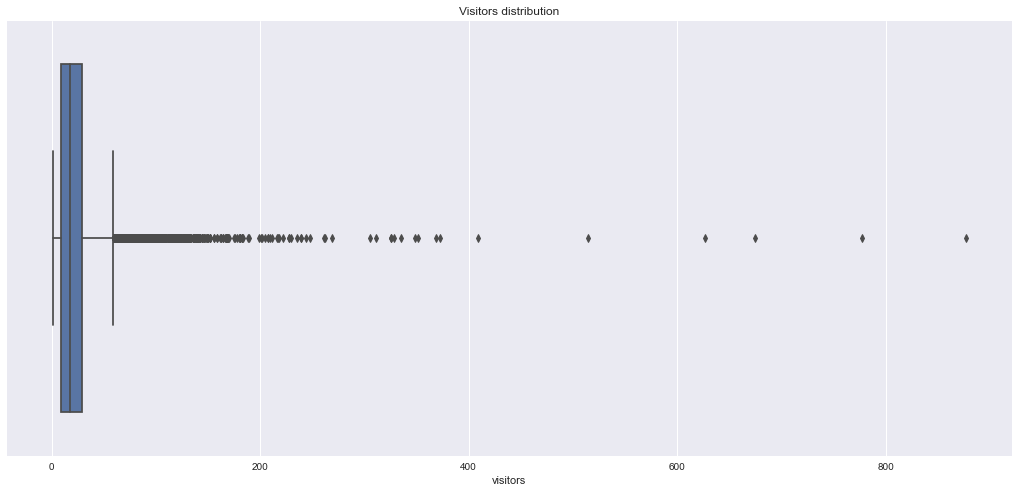

In [15]:
fig = plt.figure(figsize=(18, 8))

sns.boxplot(visitors_data.visitors)
plt.title("Visitors distribution")

In [16]:
visitors_data.visitors.describe()

count    252108.000000
mean         20.973761
std          16.757007
min           1.000000
25%           9.000000
50%          17.000000
75%          29.000000
max         877.000000
Name: visitors, dtype: float64

In [6]:
visitors_data.visitors.quantile([0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.99,0.992,0.994,0.995,1.])
#need clarification can we remove this records having more than 73 visitors??

0.100      4.0
0.250      9.0
0.500     17.0
0.750     29.0
0.800     33.0
0.900     43.0
0.950     52.0
0.980     64.0
0.990     73.0
0.992     76.0
0.994     81.0
0.995     84.0
1.000    877.0
Name: visitors, dtype: float64

<h3>Observations:</h3>

1. We can Observe from above graph ans percentail values, 99.5% of restaurants have less than 84 visitors.
2. there are some outliers, less than 0.5% restaurants has 877 around visitors.

<h3>Main Takeaways </h3>

1. From 2016-07 Number of visitors per day are increased drastically. This is because number of restaurants got increased in month 2016-07. </br>
2. Day of week, and month of the year has impact on number of visitors.
3. Number of reservations per day increased in December and January.
4. Hour of the day has impact on number of visitors.
5. Hours difference between, visit time and reserve time has some importance. Because more number of visitors are opting spot registration or just hours before registration.
6. From Data we observed, some genre restaurants has more vistors. 
7. Some areas has more restaurants. which will add some importance. more restaurants are likely to have more visitors.
8. From latitude and longitude features, we Observed Cities like Tokyo, Fokuku, Osaka and Hirosima has more restaurants. Using latitudes and logitudes we can find near by restaurant count etc. 